# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [1]:
%pip install --upgrade plotly

Requirement already up-to-date: plotly in c:\users\worldcole\anaconda3\lib\site-packages (4.14.3)Note: you may need to restart the kernel to use updated packages.



### Import Statements

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [4]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [5]:
print(f"The shape of the data is {df_data.shape}.")

The shape of the data is (962, 16).


In [6]:
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


In [7]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [8]:
print(f"The first Nobel Prize was awarded in {df_data.year.min()} ")
print(f"The latest year included in the dataset is {df_data.year.max()}")

The first Nobel Prize was awarded in 1901 
The latest year included in the dataset is 2020


**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [9]:
print(f"Duplicate values: {df_data.duplicated().values.any()}")
print(f"NaN values: {df_data.isna().values.any()}")

Duplicate values: False
NaN values: True


### Check for NaN Values

In [10]:
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

Filtering on the subset with NaN values

In [11]:
col_subset = ["year", "category", "laureate_type", "birth_date", "full_name", "organization_name"]
df_data.loc[df_data.birth_date.isna()][col_subset]

,year,category,laureate_type,birth_date,full_name,organization_name
24,1904,Peace,Organization,NaN,Institut de droit international (Institute of ...,NaN
60,1910,Peace,Organization,NaN,Bureau international permanent de la Paix (Per...,NaN
89,1917,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
200,1938,Peace,Organization,NaN,Office international Nansen pour les Réfugiés ...,NaN
215,1944,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
237,1947,Peace,Organization,NaN,American Friends Service Committee (The Quakers),NaN
238,1947,Peace,Organization,NaN,Friends Service Council (The Quakers),NaN
283,1954,Peace,Organization,NaN,Office of the United Nations High Commissioner...,NaN
348,1963,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
349,1963,Peace,Organization,NaN,Ligue des Sociétés de la Croix-Rouge (League o...,NaN


The birth_date column NaN values coincide with NaN values for organization_name.
These may include birth_date values for organizations such as EU and UN.
We can also that for the NaN values in organization_name column, the organi 

In [12]:
col_subset = ["year", "category", "laureate_type", "birth_date", "full_name", "organization_name"]
df_data.loc[df_data.organization_name.isna()][col_subset]

,year,category,laureate_type,birth_date,full_name,organization_name
1,1901,Literature,Individual,1839-03-16,Sully Prudhomme,NaN
3,1901,Peace,Individual,1822-05-20,Frédéric Passy,NaN
4,1901,Peace,Individual,1828-05-08,Jean Henry Dunant,NaN
7,1902,Literature,Individual,1817-11-30,Christian Matthias Theodor Mommsen,NaN
9,1902,Peace,Individual,1843-05-21,Charles Albert Gobat,NaN
...,...,...,...,...,...,...
932,2018,Peace,Individual,1993-07-02,Nadia Murad,NaN
942,2019,Literature,Individual,1942-12-06,Peter Handke,NaN
946,2019,Peace,Individual,1976-08-15,Abiy Ahmed Ali,NaN
954,2020,Literature,Individual,1943-04-22,Louise Glück,NaN


Most NaN values in the organization_name column seem to be caused by individuals who were affiliated to any organization.

### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [13]:
df_data.birth_date = pd.to_datetime(df_data.birth_date)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

#### Add a Column with the Prize Share as a Percentage

In [14]:
separated_values = df_data.prize_share.str.split("/", expand=True)
numerator = pd.to_numeric(separated_values[0])
denominator = pd.to_numeric(separated_values[1])
df_data["share_pct"] = numerator/denominator * 100
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [15]:
nobel_by_gender = df_data.sex.value_counts()

In [16]:
fig = px.pie(
    data_frame=nobel_by_gender,
    names=nobel_by_gender.index,
    values=nobel_by_gender.values,
    labels=nobel_by_gender.index,
    title="Nobel Prizes by Gender",
    hover_name=nobel_by_gender.index,
    hole=0.6
)
fig.update_traces(textposition="inside", textfont_size=15, textinfo="percent")

Nobel prize winners has been predominantly male, with only 6.21% going to women.

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [17]:
df_data[df_data.sex == "Female"].sort_values("year")[:3]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,25.00
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,100.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,100.00


Marie Curie, née Sklodowska was the first woman to win the Nobel Prize in 1903

# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [18]:
is_winner = df_data.duplicated(subset=["full_name"], keep=False)
multiple_winners = df_data[is_winner]

In [19]:
multiple_winners.full_name[multiple_winners.laureate_type == "Organization"].nunique()

2

In [20]:
print(f"There have been {multiple_winners.full_name.nunique()} winners who have won the Nobel Prize more than once.")
print(f"{multiple_winners.full_name[multiple_winners.laureate_type == 'Individual'].nunique()} individuals and"
f" {multiple_winners.full_name[multiple_winners.laureate_type == 'Organization'].nunique()}"
f" organizations won more than once.")

There have been 6 winners who have won the Nobel Prize more than once.
4 individuals and 2 organizations won more than once.


# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [21]:
print(f"There are {df_data.category.nunique()} categories in which prizes are awarded.")

There are 6 categories in which prizes are awarded.


In [22]:
nobel_by_category = df_data.category.value_counts()

In [23]:
categor_bar = px.bar(
    data_frame=nobel_by_category,
    x=nobel_by_category.index,
    y=nobel_by_category.values,
    color=nobel_by_category.values,
    color_continuous_scale="Aggrnyl",
    title="Number of Nobel Prizes per Category"
)
categor_bar.update_layout(
    xaxis_title="Nobel Category",
    yaxis_title="Number of Prizes",
    coloraxis_showscale=False
)

**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [24]:
df_data.sort_values("year")

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,100.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,100.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,100.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,50.00
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,50.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,2020,Chemistry,The Nobel Prize in Chemistry 2020,“for the development of a method for genome ed...,1/2,Individual,Jennifer A. Doudna,1964-02-19,"Washington, DC",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA,50.00
950,2020,Chemistry,The Nobel Prize in Chemistry 2020,“for the development of a method for genome ed...,1/2,Individual,Emmanuelle Charpentier,1968-12-11,Juvisy-sur-Orge,France,France,Female,Max-Planck-Institut,Berlin,Germany,FRA,50.00
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU,25.00
954,2020,Literature,The Nobel Prize in Literature 2020,“for her unmistakable poetic voice that with a...,1/1,Individual,Louise Glück,1943-04-22,"New York, NY",United States of America,United States of America,Female,NaN,NaN,NaN,USA,100.00


In [25]:
df_data.sort_values("year")[df_data.category == "Economics"][:3]

<ipython-input-25-b1eff5b9cfe1>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,50.00
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway,NOR,50.00
402,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",1/1,Individual,Paul A. Samuelson,1915-05-15,"Gary, IN",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA,100.00


There are fewer Nobel Prizes for the Economic category because the Economics Prize is much newer. It was first awarded in 1969 as compared to 1901 for the first award.

# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [26]:
nobel_by_category_by_gender = df_data.groupby(["category", "sex"], as_index=False).agg({"prize": pd.Series.count})
nobel_by_category_by_gender.sort_values("prize", ascending=False, inplace=True)
nobel_by_category_by_gender

,category,sex,prize
11,Physics,Male,212
7,Medicine,Male,210
1,Chemistry,Male,179
5,Literature,Male,101
9,Peace,Male,90
3,Economics,Male,84
8,Peace,Female,17
4,Literature,Female,16
6,Medicine,Female,12
0,Chemistry,Female,7


In [27]:
stacked_bar = px.bar(
    data_frame=nobel_by_category_by_gender,
    x=nobel_by_category_by_gender.category,
    y=nobel_by_category_by_gender.prize,
    color=nobel_by_category_by_gender.sex,
    title="The Number of Nobel Prizes by Category and by Gender"
)
stacked_bar.update_layout(
    xaxis_title="Nobel Prize Category",
    yaxis_title="Number of Prizes" 
)

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [28]:
nobel_by_year = df_data.groupby("year")
nobel_by_year_count = nobel_by_year.count().prize
nobel_by_year_rolling = nobel_by_year.count().prize.rolling(window=5).mean()

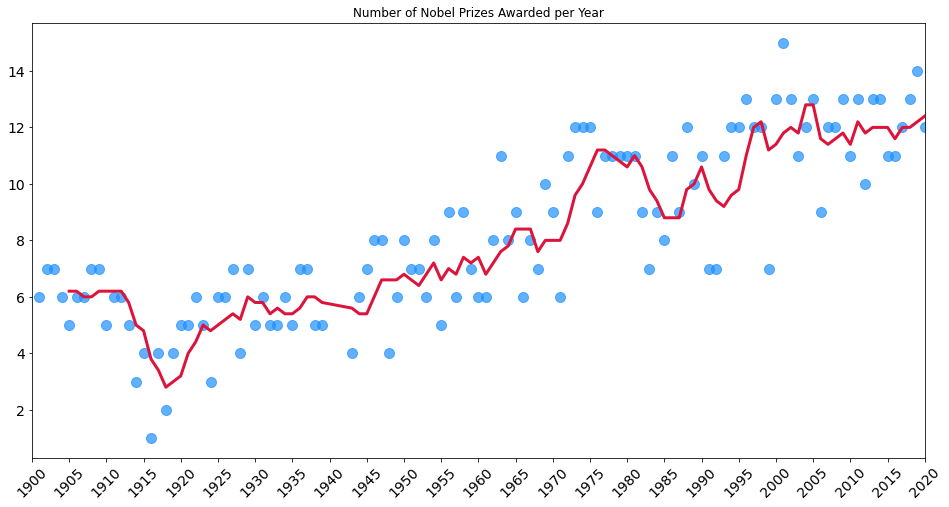

In [29]:
plt.figure(figsize=(16, 8))
plt.title("Number of Nobel Prizes Awarded per Year")
plt.xticks(
    fontsize=14,
    ticks=np.arange(1900, 2021, 5),
    rotation=45
)
plt.yticks(fontsize=14)
ax = plt.gca()
ax.set_xlim(1900, 2020)
plt.scatter(
    x = nobel_by_year_count.index,
    y = nobel_by_year_count.values,
    c="dodgerblue",
    alpha=0.7,
    s=100    
)
plt.plot(
    nobel_by_year_count.index,
    nobel_by_year_rolling.values,
    c="crimson",
    linewidth=3,
)

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [30]:
year_average_share = df_data.groupby(by="year").agg({"share_pct": pd.Series.mean})
year_average_rolling = year_average_share.rolling(window=5).mean()

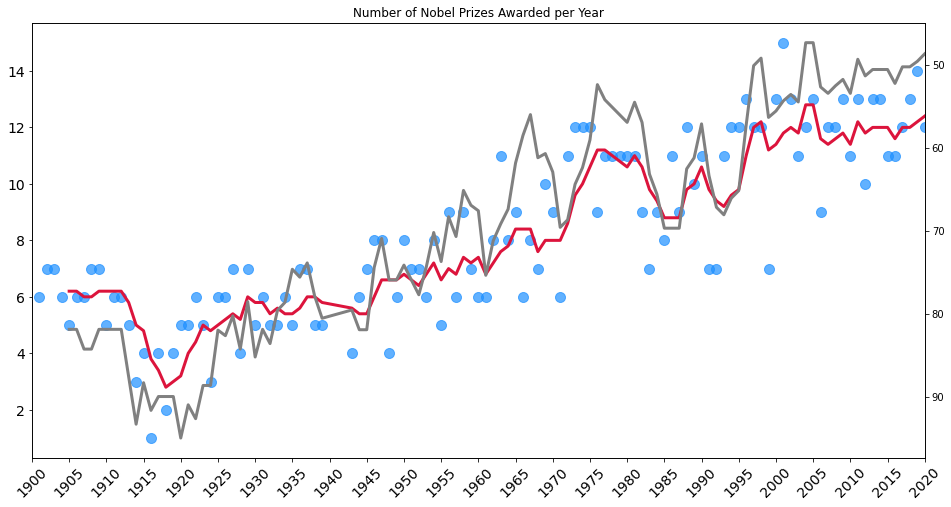

In [31]:
plt.figure(figsize=(16, 8))
plt.title("Number of Nobel Prizes Awarded per Year")
plt.xticks(
    fontsize=14,
    ticks=np.arange(1900, 2021, 5),
    rotation=45
)
plt.yticks(fontsize=14)
ax = plt.gca()
ax2=ax.twinx()
ax2.invert_yaxis()
ax.set_xlim(1900, 2020)
ax.scatter(
    x = nobel_by_year_count.index,
    y = nobel_by_year_count.values,
    c="dodgerblue",
    alpha=0.7,
    s=100    
)
ax.plot(
    nobel_by_year_count.index,
    nobel_by_year_rolling.values,
    c="crimson",
    linewidth=3,
)
ax2.plot(
    nobel_by_year_count.index,
    year_average_rolling.values,
    c="gray",
    linewidth=3,
)

# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [32]:
top_countries = df_data.groupby(["birth_country_current"], as_index=False).agg({"prize": pd.Series.count})
top_countries.sort_values("prize", inplace=True)
top_20_countries = top_countries[-20:]
top_20_countries

,birth_country_current,prize
7,Belgium,9
31,Hungary,9
33,India,9
2,Australia,10
20,Denmark,12
54,Norway,12
13,China,12
51,Netherlands,18
3,Austria,18
39,Italy,19


In [33]:
bar = px.bar(
    data_frame=top_20_countries,
    title="Top 20 Countries with the most Nobel Prizes",
    y="birth_country_current",
    x="prize",
    color="prize",
    color_continuous_scale="Aggrnyl",
    orientation="h"
)
bar.update_layout(
    yaxis_title="Country",
    xaxis_title="Total Number of Nobel Prizes",
    coloraxis_showscale=False
)
bar.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [34]:
nobel_country = df_data.groupby(["birth_country_current", "ISO"], as_index=False).agg({"prize": pd.Series.count})

In [35]:
px.choropleth(
    nobel_country,
    locations="ISO",
    color="prize",
    color_continuous_scale=px.colors.sequential.matter,
    hover_name="birth_country_current"
)

In [36]:
bar = px.bar(
    data_frame=top_20_countries,
    title="Top 20 Countries with the most Nobel Prizes",
    y="birth_country_current",
    x="prize",
    color="prize",
    color_continuous_scale="Aggrnyl",
    orientation="h"
)
bar.update_layout(
    yaxis_title="Country",
    xaxis_title="Total Number of Nobel Prizes",
    coloraxis_showscale=False
)
bar.show()

# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [37]:
top_countries_category = df_data.groupby(["birth_country_current", "category"], as_index=False).agg({"prize": pd.Series.count})
top_countries_category.sort_values("prize", ascending=False, inplace=True)

In [38]:
merged_df = pd.merge(top_countries_category, top_20_countries, on="birth_country_current")
merged_df.columns = ['birth_country_current', 'category', 'cat_prizes', 'total_prizes'] 
merged_df.sort_values(by="total_prizes",  inplace=True)
merged_df

,birth_country_current,category,cat_prizes,total_prizes
109,India,Physics,1,9
108,India,Peace,1,9
88,Belgium,Peace,3,9
89,Belgium,Medicine,3,9
90,Belgium,Chemistry,1,9
...,...,...,...,...
4,United States of America,Peace,19,281
3,United States of America,Economics,49,281
2,United States of America,Chemistry,55,281
1,United States of America,Physics,70,281


In [39]:
px.bar(
    data_frame=merged_df,
    y="birth_country_current",
    x="cat_prizes",
    color="category",
    orientation="h"
)

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [40]:
prizes_over_time = df_data.groupby(["birth_country_current", "year"], as_index=False).count()
prizes_over_time

,birth_country_current,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,Algeria,1957,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1
1,Algeria,1997,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,Argentina,1936,1,1,0,1,1,1,1,1,1,1,0,0,0,1,1
3,Argentina,1947,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,Argentina,1980,1,1,0,1,1,1,1,1,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,United States of America,2020,7,7,7,7,7,7,7,7,7,7,6,6,6,7,7
623,Venezuela,1980,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
624,Vietnam,1973,1,1,0,1,1,1,1,1,1,1,0,0,0,1,1
625,Yemen,2011,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1


In [41]:
cumulative_prizes = prizes_over_time.groupby(["birth_country_current", "year"]).sum().groupby("birth_country_current").cumsum()
cumulative_prizes.reset_index(inplace=True)

In [42]:
line_chart = px.line(
    data_frame=cumulative_prizes,
    x='year',
    y='prize',
    color='birth_country_current',
    hover_name = "birth_country_current"
)
line_chart.update_layout(
    xaxis_title="Year",
    yaxis_title="Number of Prizes"
)

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [43]:
df_data.organization_name

0             Berlin University
1                           NaN
2            Marburg University
3                           NaN
4                           NaN
                 ...           
957       University of Alberta
958                         NaN
959    University of California
960    University of California
961        University of Oxford
Name: organization_name, Length: 962, dtype: object

In [44]:
top_organizations = df_data.groupby(["organization_name"], as_index=False).agg({"prize": pd.Series.count})
top_organizations.sort_values("prize", inplace=True)
top_20_organizations = top_organizations[-20:]
top_20_organizations

,organization_name,prize
79,Institut Pasteur,7
109,London University,7
67,Harvard Medical School,7
192,University College London,7
40,Cornell University,8
12,Bell Laboratories,8
258,Yale University,9
111,MRC Laboratory of Molecular Biology,10
222,University of Oxford,12
152,Rockefeller University,13


In [45]:
bar = px.bar(
    data_frame=top_20_organizations,
    y="organization_name",
    x="prize",
    color="prize",
    hover_name="organization_name",
    orientation="h",
    title="Top 20 Organizations with the most Nobel Prizes"
)
bar.update_layout(
    xaxis_title="Number of Nobel Prizes",
    yaxis_title="Institution",
    coloraxis_showscale=False
)
bar.show()

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [46]:
top_20_cities = df_data.organization_city.value_counts()[:20]
top_20_cities.sort_values(ascending=True, inplace=True)
top_20_cities

Los Angeles, CA     8
Ithaca, NY          8
Munich              9
New Haven, CT       9
Heidelberg          9
Boston, MA          9
Stockholm          10
Moscow             10
Berlin             12
Oxford             12
Pasadena, CA       17
Princeton, NJ      19
Chicago, IL        20
Berkeley, CA       21
Stanford, CA       24
Paris              25
London             27
Cambridge          31
New York, NY       45
Cambridge, MA      50
Name: organization_city, dtype: int64

In [47]:
bar = px.bar(
    data_frame=top_20_cities,
    y=top_20_cities.index,
    x=top_20_cities.values,
    color=top_20_cities.values,
    hover_name=top_20_cities.index,
    orientation="h",
    title="Top 20 Cities with the most Nobel Prizes"
)
bar.update_layout(
    xaxis_title="Number of Nobel Prizes",
    yaxis_title="City",
    coloraxis_showscale=False
)
bar.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [48]:
top_20_birth_cities = df_data.birth_city.value_counts()[:20]
top_20_birth_cities.sort_values(ascending=True, inplace=True)
top_20_birth_cities

Adelaide                  3
Montreal                  4
Pittsburgh, PA            4
Cairo                     4
Prague                    5
Frankfurt-on-the-Main     5
Hamburg                   6
Stockholm                 6
Munich                    7
Moscow                    7
Washington, DC            8
Brooklyn, NY              8
Boston, MA                8
Budapest                  8
Berlin                   11
Chicago, IL              12
Vienna                   14
London                   19
Paris                    26
New York, NY             53
Name: birth_city, dtype: int64

In [49]:
bar = px.bar(
    data_frame=top_20_birth_cities,
    y=top_20_birth_cities.index,
    x=top_20_birth_cities.values,
    color=top_20_birth_cities.values,
    hover_name=top_20_birth_cities.index,
    orientation="h",
    title="Top 20 Birth Cities of Nobel Prize Winners"
)
bar.update_layout(
    xaxis_title="Number of Nobel Prizes",
    yaxis_title="Birth City",
    coloraxis_showscale=False
)
bar.show()

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [50]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO', 'share_pct'],
      dtype='object')

In [51]:
country_city_organization = df_data.groupby(["organization_country", "organization_city", "organization_name"], as_index=False).agg({"prize": pd.Series.count})
country_city_organization

,organization_country,organization_city,organization_name,prize
0,Argentina,Buenos Aires,Institute for Biochemical Research,1
1,Argentina,Buenos Aires,Instituto de Biologia y Medicina Experimental ...,1
2,Australia,Canberra,Australian National University,1
3,Australia,Melbourne,Walter and Eliza Hall Institute for Medical Re...,1
4,Australia,Nedlands,"NHMRC Helicobacter pylori Research Laboratory,...",1
...,...,...,...,...
286,United States of America,"West Lafayette, IN",Purdue University,2
287,United States of America,"Wilmington, DE",Du Pont,1
288,United States of America,"Woods Hole, MA",Marine Biological Laboratory (MBL),1
289,United States of America,"Worcester, MA",University of Massachusetts Medical School,1


In [52]:
burst = px.sunburst(
    data_frame=country_city_organization,
    path=["organization_country", "organization_city", "organization_name"],
    values="prize"
)
burst.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



In [53]:
df_data["winning_age"] = df_data.year - df_data.birth_date.dt.year
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,100.00,49.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,100.00,62.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,100.00,47.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,50.00,79.00
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,50.00,73.00


### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [54]:
display(df_data.nlargest(n=1, columns="winning_age"))
display(df_data.nsmallest(n=1, columns="winning_age"))

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU,33.33,97.00


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,50.00,17.00


### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

In [55]:
df_data.winning_age.describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

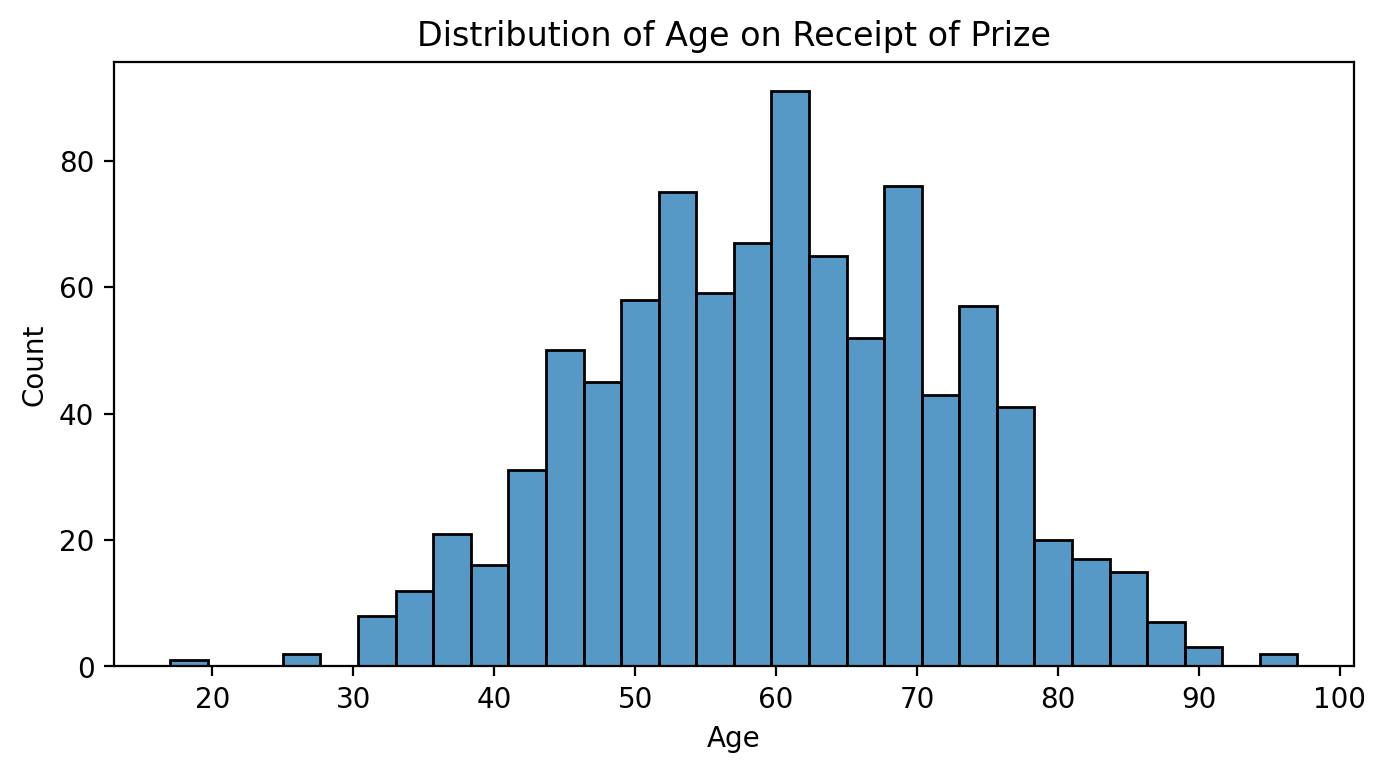

In [56]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df_data,
             x=df_data.winning_age,
             bins=30)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


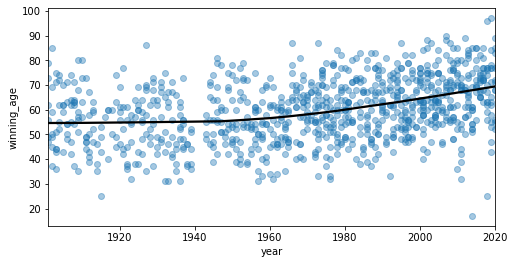

In [61]:
plt.figure(figsize=(8,4))
sns.regplot(
    data=df_data,
    x="year",
    y="winning_age",
    lowess=True, 
    scatter_kws = {'alpha': 0.4},
    line_kws={'color': 'black'}
)

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

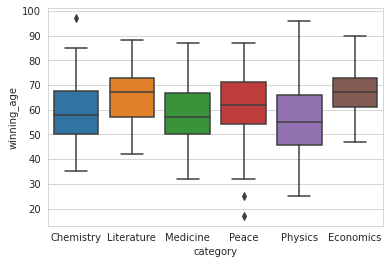

In [63]:
with sns.axes_style("whitegrid"):    
    sns.boxplot(
        data=df_data,
        x="category",
        y="winning_age"
    )

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


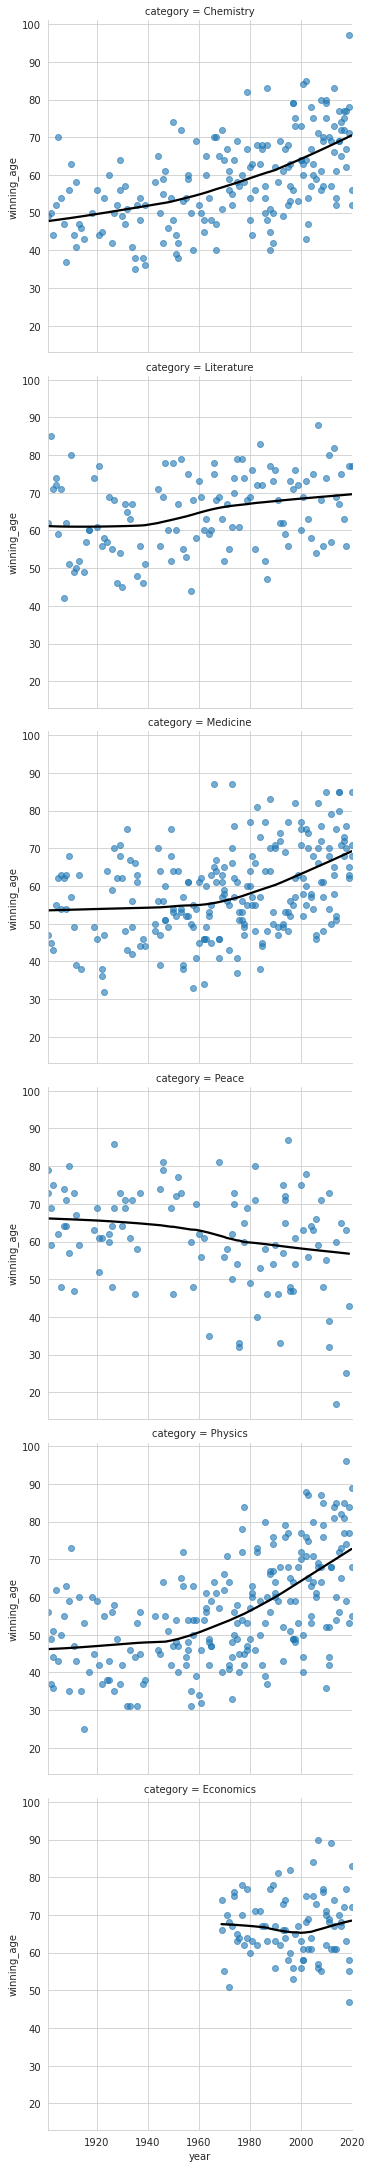

In [66]:
with sns.axes_style('whitegrid'):
    sns.lmplot(
        data=df_data,
        x="year",
        y="winning_age",
        row="category",
        lowess=True, 
        scatter_kws = {'alpha': 0.6},
        line_kws={'color': 'black'}
    )

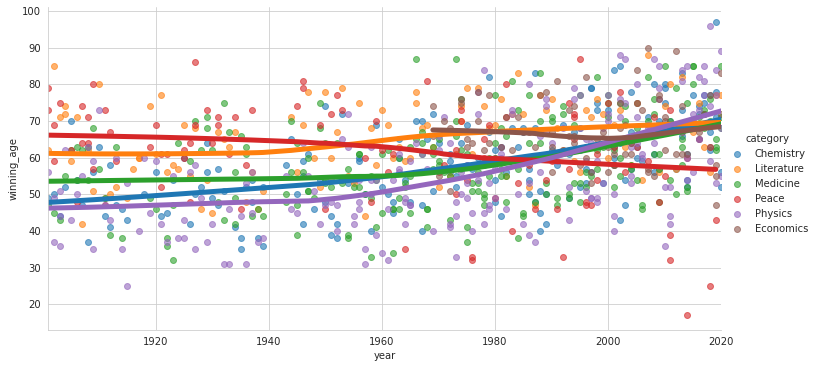

In [70]:
with sns.axes_style('whitegrid'):
    sns.lmplot(
        data=df_data,
        x="year",
        y="winning_age",
        hue="category",
        lowess=True,
        aspect=2, 
        scatter_kws = {'alpha': 0.6},
        line_kws={'linewidth': 5}
    )